# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
!pip install palmerpenguins

In [3]:
from palmerpenguins import load_penguins

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [4]:
penguins = load_penguins()
penguins = penguins.dropna()


In [5]:
# Drop rows with NaN
penguins = penguins.dropna()


In [6]:
X = penguins.drop("bill_length_mm", axis = 1)
y = penguins["bill_length_mm"]
X_train, X_test, y_train, y_test = train_test_split(X,y,)
X_train

,species,island,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
257,Gentoo,Biscoe,16.1,215.0,5500.0,male,2009
309,Chinstrap,Dream,18.8,203.0,4100.0,male,2008
234,Gentoo,Biscoe,14.6,212.0,4725.0,female,2009
103,Adelie,Biscoe,20.0,190.0,4250.0,male,2009
296,Chinstrap,Dream,17.3,181.0,3600.0,female,2007
...,...,...,...,...,...,...,...
57,Adelie,Biscoe,18.8,193.0,3800.0,male,2008
190,Gentoo,Biscoe,13.6,208.0,4350.0,female,2008
96,Adelie,Dream,18.6,190.0,3700.0,female,2008
129,Adelie,Torgersen,18.0,210.0,4000.0,male,2009


In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()
enc = OneHotEncoder()

In [8]:
# Identify categorical columns that need dummification
# 'species', 'island', 'sex'

# dummify columns
ct = ColumnTransformer(
    [("spec_dummify", enc, ["species"]),
    ("land_dummify", enc, ["island"]),
    ("sex_dummify", enc, ["sex"])]
)

# dummify pipeline
pipe = Pipeline(
    [('dummify', ct), ('ols', lr)]
)

In [9]:
#model fiting
pipe1 = pipe.fit(X_train, y_train)
pipe1

Pipeline(steps=[('dummify',
                 ColumnTransformer(transformers=[('spec_dummify',
                                                  OneHotEncoder(),
                                                  ['species']),
                                                 ('land_dummify',
                                                  OneHotEncoder(), ['island']),
                                                 ('sex_dummify',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [10]:
predpipe = pipe1.predict(X_test)
predpipe

array([36.1875, 49.25  , 47.1875, 45.6875, 40.6875, 45.6875, 45.6875, 39.75  , 45.6875, 39.75  , 49.25  , 40.8125, 47.1875,
       49.25  , 49.25  , 50.75  , 39.75  , 47.1875, 36.1875, 36.1875, 36.1875, 49.25  , 45.6875, 45.6875, 47.1875, 37.0625,
       45.6875, 45.6875, 49.25  , 50.75  , 49.25  , 49.25  , 45.6875, 50.75  , 40.6875, 49.25  , 40.6875, 40.6875, 49.25  ,
       45.6875, 45.6875, 40.8125, 49.25  , 40.8125, 50.75  , 50.75  , 37.25  , 49.25  , 40.6875, 49.25  , 37.0625, 49.25  ,
       47.1875, 36.1875, 49.25  , 49.25  , 40.8125, 49.25  , 45.6875, 37.25  , 45.6875, 45.6875, 45.6875, 49.25  , 45.6875,
       36.1875, 45.6875, 37.0625, 45.6875, 37.0625, 45.6875, 49.25  , 49.25  , 40.8125, 36.1875, 47.1875, 47.1875, 37.0625,
       50.75  , 45.6875, 39.75  , 37.25  , 37.0625, 49.25  ])

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

### Simple linear regression

In [11]:
# Prepare data for linear regression
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

In [12]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y)
X_train1


,bill_length_mm
246,44.5
134,38.1
267,55.1
177,46.1
194,45.3
...,...
202,46.6
73,45.8
40,36.5
185,59.6


In [13]:
# Fit a simple linear regression model
linear_pipe = Pipeline(
    [('ols', lr)]
)

# Fit the model
fit_linear_pipe = linear_pipe.fit(X_train1, y_train1)
fit_linear_pipe


y_pred_linear  = fit_linear_pipe.predict(X_test1)
y_pred_linear


array([16.60063785, 17.67854479, 17.47698496, 16.05730264, 16.5831109 , 17.36305983, 17.47698496, 17.81876033, 17.34553289,
       16.98623057, 16.99499405, 17.31924248, 16.46918578, 17.08262876, 16.7671438 , 17.46822149, 17.24037124, 16.98623057,
       17.36305983, 17.26666165, 17.60843702, 16.91612281, 17.65225438, 17.96773934, 17.51203884, 17.93268545, 17.46822149,
       16.56558396, 16.88106892, 17.22284429, 16.5831109 , 16.55682049, 17.48574843, 17.3718233 , 17.45945801, 17.81876033,
       16.84601504, 17.87134116, 16.6444552 , 17.83628727, 16.60063785, 16.3727876 , 16.63569173, 17.05633834, 17.34553289,
       18.13424529, 16.53929355, 16.90735933, 17.77494297, 16.72332644, 16.50423966, 16.55682049, 16.49547619, 17.13520958,
       16.9774671 , 17.8275238 , 17.30171553, 16.67950909, 17.00375752, 17.08262876, 17.38058677, 16.69703603, 16.50423966,
       16.88106892, 16.53053008, 17.73988909, 16.65321867, 17.54709273, 17.19655388, 16.59187437, 16.43413189, 16.62692826,
       1

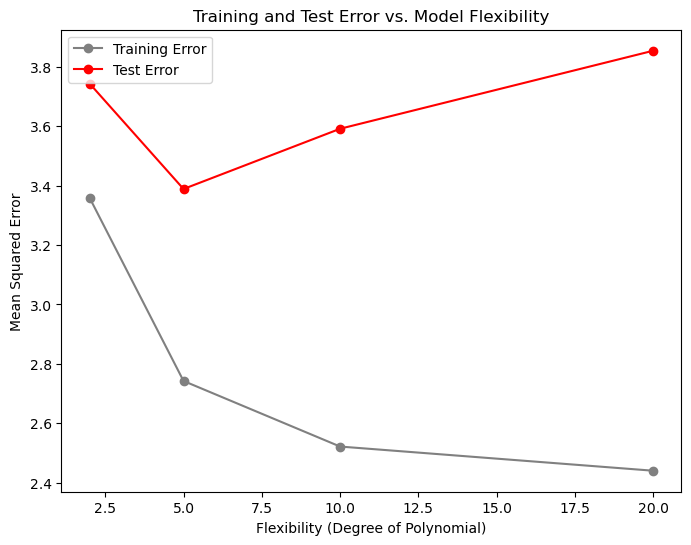

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


degrees = [2, 5, 10, 20]

train_errors = []
test_errors = []

for degree in degrees:
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear_regression', LinearRegression())
    ])

    model.fit(X_train1, y_train1)

    # Predict on training and test data
    y_train_pred = model.predict(X_train1)
    y_test_pred = model.predict(X_test1)

    # Calculate MSE for training and test sets
    train_errors.append(mean_squared_error(y_train1, y_train_pred))
    test_errors.append(mean_squared_error(y_test1, y_test_pred))

# Plotting the training and test errors vs. model complexity (degree of polynomial)
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, label="Training Error", color="gray", marker='o')
plt.plot(degrees, test_errors, label="Test Error", color="red", marker='o')
plt.xlabel("Flexibility (Degree of Polynomial)")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Error vs. Model Flexibility")
plt.legend()
plt.show()

#### Quadratic

In [15]:
poly_features_2 = PolynomialFeatures(2)

my_pipeline_quadratic = Pipeline(
    [("squaring", poly_features_2), ('ols', lr)]
)

fitted_my_pipeline_quad = my_pipeline_quadratic.fit(X_train1, y_train1)
fitted_my_pipeline_quad

y_preds_quad = fitted_my_pipeline_quad.predict(X_test1)
y_preds_quad

array([16.57667963, 18.01096776, 17.3482244 , 17.82127463, 16.59624299, 17.05391127, 17.3482244 , 18.57904789, 17.01377855,
       16.49348354, 16.49931204, 16.95615256, 16.75685527, 16.57646652, 16.45927231, 17.32352644, 16.80180099, 16.49348354,
       17.05391127, 16.85016378, 17.75986347, 16.45920644, 17.91423054, 19.27886726, 17.45044703, 19.10528377, 17.32352644,
       16.61717868, 16.45030183, 16.77127453, 16.59624299, 16.62816115, 17.37326543, 17.07449226, 17.29917156, 18.57904789,
       16.44688652, 18.81472129, 16.53377513, 18.65623337, 16.57667963, 16.93804466, 16.54166986, 16.54971782, 17.01377855,
       20.17835201, 16.65115532, 16.45646566, 18.39208813, 16.47816113, 16.70126065, 16.62816115, 16.71464468, 16.63922709,
       16.48799812, 18.61746909, 16.91945065, 16.50562699, 16.50548362, 16.57646652, 17.09541632, 16.4936114 , 16.70126065,
       16.45030183, 16.66316703, 18.24869577, 16.52622347, 17.55815897, 16.72805795, 16.58628977, 16.81793918, 16.54990768,
       1

#### Cubic

In [16]:
# Prepare data for cubic regression
poly_features_3 = PolynomialFeatures(3)


cubic_pipe = Pipeline(
    [("cube", poly_features_3), ('ols', lr)]
)

fit_quadratic_cube = cubic_pipe.fit(X_train1, y_train1)
fit_quadratic_cube

y_pred_cubic = fit_quadratic_cube.predict(X_test1)
y_pred_cubic


array([16.39946223, 18.03520005, 17.53911815, 18.22835219, 16.41693615, 17.2600715 , 17.53911815, 18.35232634, 17.21827356,
       16.51854038, 16.53050072, 17.15639053, 16.58958192, 16.66717423, 16.34187   , 17.51735424, 16.97798864, 16.51854038,
       17.2600715 , 17.03609944, 17.8653871 , 16.43528595, 17.9721376 , 18.63529926, 17.62635985, 18.57510389, 17.51735424,
       16.43675252, 16.40251677, 16.94010264, 16.41693615, 16.44755288, 17.56090618, 17.28111673, 17.49561994, 18.35232634,
       16.37612272, 18.45988119, 16.36573665, 18.38899902, 16.39946223, 16.8219298 , 16.37136559, 16.62306748, 17.21827356,
       18.85312217, 16.47096551, 16.42651525, 18.25740576, 16.33903414, 16.52519245, 16.44755288, 16.54032332, 16.76257854,
       16.50691242, 18.37076072, 17.11574199, 16.34863663, 16.54278794, 16.66717423, 17.30225213, 16.343259  , 16.52519245,
       16.40251677, 16.48358877, 18.17850118, 16.36065479, 17.71363496, 16.88466554, 16.40790913, 16.66448622, 16.37754711,
       1

#### Degree Polynomial 10

In [17]:
# Prepare data for degree 10 polynomial regression
poly_features_10 = PolynomialFeatures(10)

degree10_pipe = Pipeline(
    [("squaring", poly_features_10), ('ols', lr)]
)

fit_degree_10 = degree10_pipe.fit(X_train1, y_train1)
fit_degree_10

y_pred_degree10 = fit_degree_10.predict(X_test1)
y_pred_degree10


array([16.58138795, 18.33137533, 18.36319756, 17.17248647, 16.73050632, 17.91353252, 18.36319756, 17.76080267, 17.81955912,
       15.62361341, 15.65914742, 17.66870769, 17.74818953, 16.11178509, 15.54435092, 18.33977893, 17.16277388, 15.62361341,
       17.91353252, 17.33826408, 18.46502999, 15.41951268, 18.39576789, 17.0019718 , 18.43646865, 17.16993908, 18.33977893,
       16.8838536 , 15.37689977, 17.04347308, 16.73050632, 16.96175927, 18.38459712, 17.95835192, 18.31436699, 17.76080267,
       15.37764716, 17.48802378, 16.23386174, 17.67137185, 16.58138795, 18.47629037, 16.30000488, 15.95967103, 17.81955912,
       16.60961328, 17.11928515, 15.40492006, 17.97186375, 15.73459371, 17.43671514, 16.96175927, 17.51558623, 16.44556305,
       15.59015356, 17.71635467, 17.56233191, 15.98921444, 15.69668384, 16.11178509, 18.0016478 , 15.88008999, 17.43671514,
       15.37689977, 17.19859183, 18.12229728, 16.16961543, 18.47633039, 16.86278294, 16.65535023, 18.04199188, 16.36794099,
       1

### Predictions

In [18]:
predictions = pd.DataFrame({"y_test": y_test1,
              "Linear": y_pred_linear,
              "Quadratic": y_preds_quad,
              "Cubic": y_pred_cubic,
              "Polynomial 10": y_pred_degree10,
              "bill_length_mm": X_test1["bill_length_mm"]})
predictions



,y_test,Linear,Quadratic,Cubic,Polynomial 10,bill_length_mm
193,16.0,16.600638,16.576680,16.399462,16.581388,49.6
117,20.5,17.678545,18.010968,18.035200,18.331375,37.3
93,18.1,17.476985,17.348224,17.539118,18.363198,39.6
339,19.8,16.057303,17.821275,18.228352,17.172486,55.8
217,16.8,16.583111,16.596243,16.416936,16.730506,49.8
...,...,...,...,...,...,...
309,18.8,16.477949,16.742442,16.572513,17.671507,51.0
284,18.9,16.916123,16.459206,16.435286,15.419513,46.0
186,14.8,16.644455,16.533775,16.365737,16.233862,49.1
27,17.9,17.398114,17.138294,17.344771,18.083448,40.5


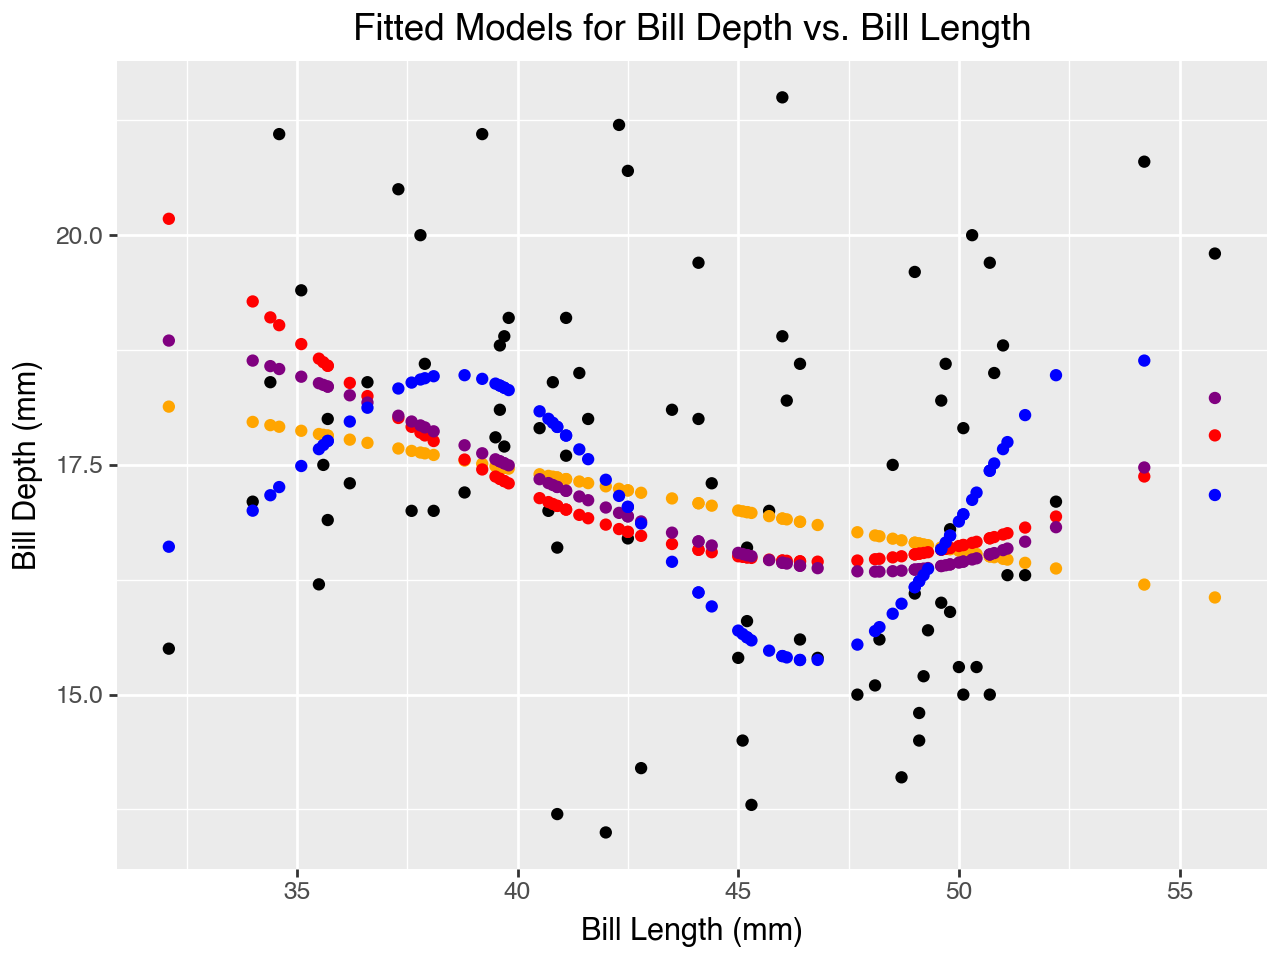

In [19]:
(ggplot(predictions, aes(x = "bill_length_mm", y = "y_test"))
 + geom_point()
 + geom_point(aes(y = "Linear"), color = "orange")
 + geom_point(aes(y = "Quadratic"), color = 'red')
 + geom_point(aes(y = "Cubic"), color = "purple")
 + geom_point(aes(y = "Polynomial 10"), color = 'blue')
 + labs(x = 'Bill Length (mm)', y = 'Bill Depth (mm)',
      title = 'Fitted Models for Bill Depth vs. Bill Length')
)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?



1. **Underfitting**:
   - The **Linear model** (orange) appears to underfit the data. This is because it does not capture the curvature in the data, providing a very simplified, straight-line approximation. This model does not follow the general pattern of the data points and fails to account for the changes in bill depth across bill lengths.

2. **Overfitting**:
   - The **Polynomial 10 model** (blue) seems to overfit the data. This model captures small fluctuations, including the noise in the data, as evidenced by its erratic, wavy pattern. It closely follows each tiny variation, suggesting it may be fitting to noise rather than capturing the overall trend of the relationship.

3. **Best Fit**:
   - The **Quadratic** (red) and **Cubic** (purple) models seem to fit the data better compared to the others. They capture the main curvature in the data without fitting to noise excessively. Between the two, the **Cubic model** might provide the best fit since it captures a slight additional complexity that matches the data's shape without overfitting.
